In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Country_Dataset1.csv')

In [3]:

df.head()

,Country,exports,health,imports,income,gdpp
0,Afghanistan,10.0,7.58,44.9,1610,553
1,Albania,28.0,6.55,48.6,9930,4090
2,Algeria,38.4,4.17,31.4,12900,4460
3,Angola,62.3,2.85,42.9,5900,3530
4,Antigua and Barbuda,45.5,6.03,58.9,19100,12200


In [4]:
df.shape

(167, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  167 non-null    object 
 1   exports  167 non-null    float64
 2   health   167 non-null    float64
 3   imports  167 non-null    float64
 4   income   167 non-null    int64  
 5   gdpp     167 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 8.0+ KB


In [6]:
df.describe()

,exports,health,imports,income,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,41.108976,6.815689,46.890215,17144.688623,12964.155689
std,27.412010,2.746837,24.209589,19278.067698,18328.704809
min,0.109000,1.810000,0.065900,609.000000,231.000000
25%,23.800000,4.920000,30.200000,3355.000000,1330.000000
50%,35.000000,6.320000,43.300000,9960.000000,4660.000000
75%,51.350000,8.600000,58.750000,22800.000000,14050.000000
max,200.000000,17.900000,174.000000,125000.000000,105000.000000


In [7]:
df.isnull().sum()

Country    0
exports    0
health     0
imports    0
income     0
gdpp       0
dtype: int64

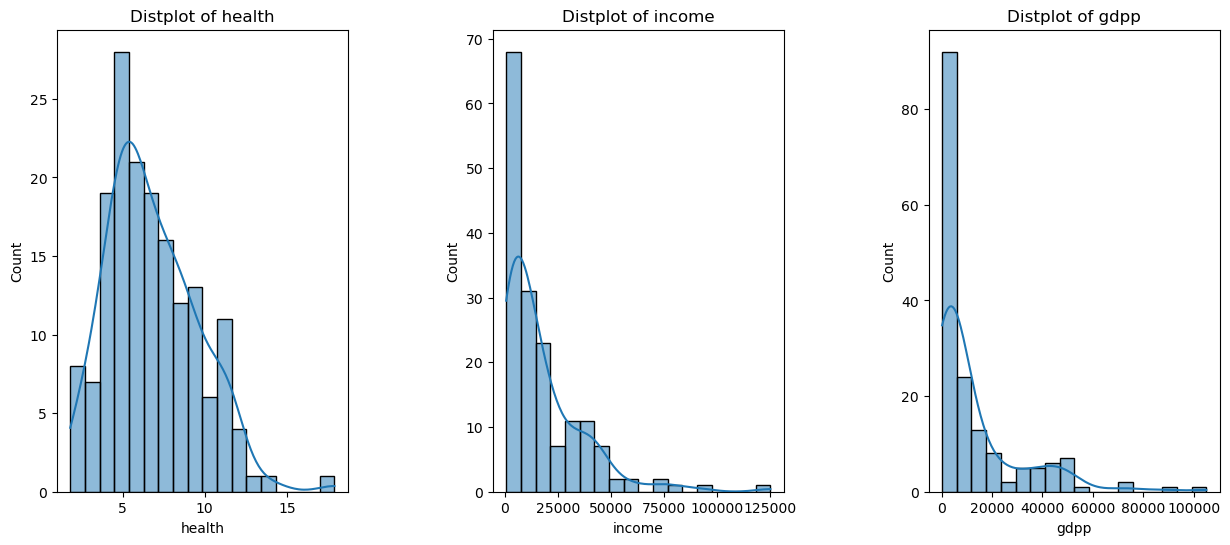

In [8]:
plt.figure(1 ,figsize = (15 , 6))
graph = 0 
for x in ['health' , 'income' , 'gdpp']:
    graph += 1  
    # ploting graph
    plt.subplot(1 , 3 , graph)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(df[x] , bins = 18,kde=True)
    plt.title('Distplot of {}'.format(x))

plt.show()

In [9]:
X = df.iloc[:, 3:5].values

In [10]:
X.shape

(167, 2)

In [11]:
X

array([[4.49e+01, 1.61e+03],
       [4.86e+01, 9.93e+03],
       [3.14e+01, 1.29e+04],
       [4.29e+01, 5.90e+03],
       [5.89e+01, 1.91e+04],
       [1.60e+01, 1.87e+04],
       [4.53e+01, 6.70e+03],
       [2.09e+01, 4.14e+04],
       [4.78e+01, 4.32e+04],
       [2.07e+01, 1.60e+04],
       [4.37e+01, 2.29e+04],
       [5.09e+01, 4.11e+04],
       [2.18e+01, 2.44e+03],
       [4.87e+01, 1.53e+04],
       [6.45e+01, 1.62e+04],
       [7.47e+01, 4.11e+04],
       [5.75e+01, 7.88e+03],
       [3.72e+01, 1.82e+03],
       [7.07e+01, 6.42e+03],
       [3.43e+01, 5.41e+03],
       [5.13e+01, 9.72e+03],
       [5.13e+01, 1.33e+04],
       [1.18e+01, 1.45e+04],
       [2.80e+01, 8.06e+04],
       [5.30e+01, 1.53e+04],
       [2.96e+01, 1.43e+03],
       [3.92e+01, 7.64e+02],
       [5.95e+01, 2.52e+03],
       [2.70e+01, 2.66e+03],
       [3.10e+01, 4.07e+04],
       [6.18e+01, 5.83e+03],
       [2.65e+01, 8.88e+02],
       [4.35e+01, 1.93e+03],
       [3.13e+01, 1.94e+04],
       [2.26e+

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

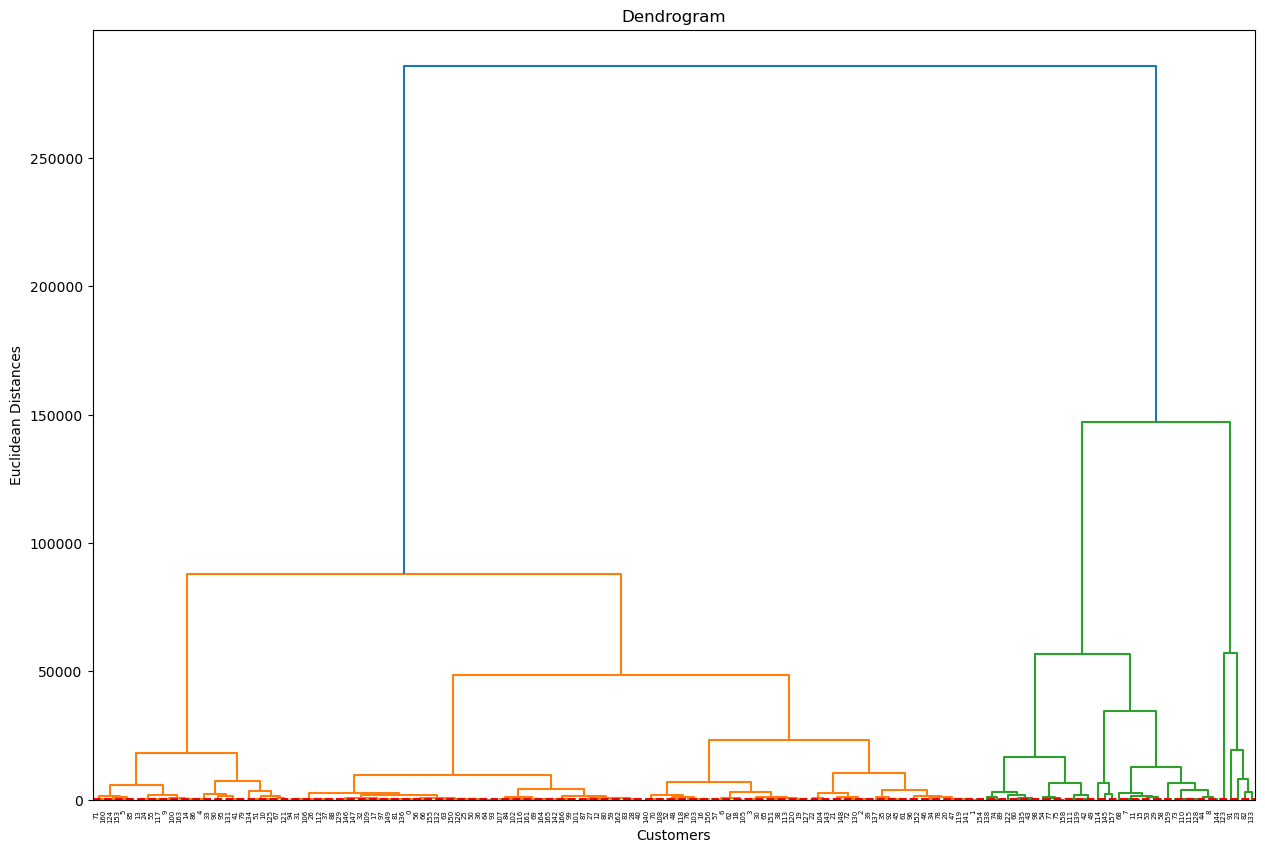

In [13]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=200, color='r', linestyle='--')
plt.show()

In [14]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

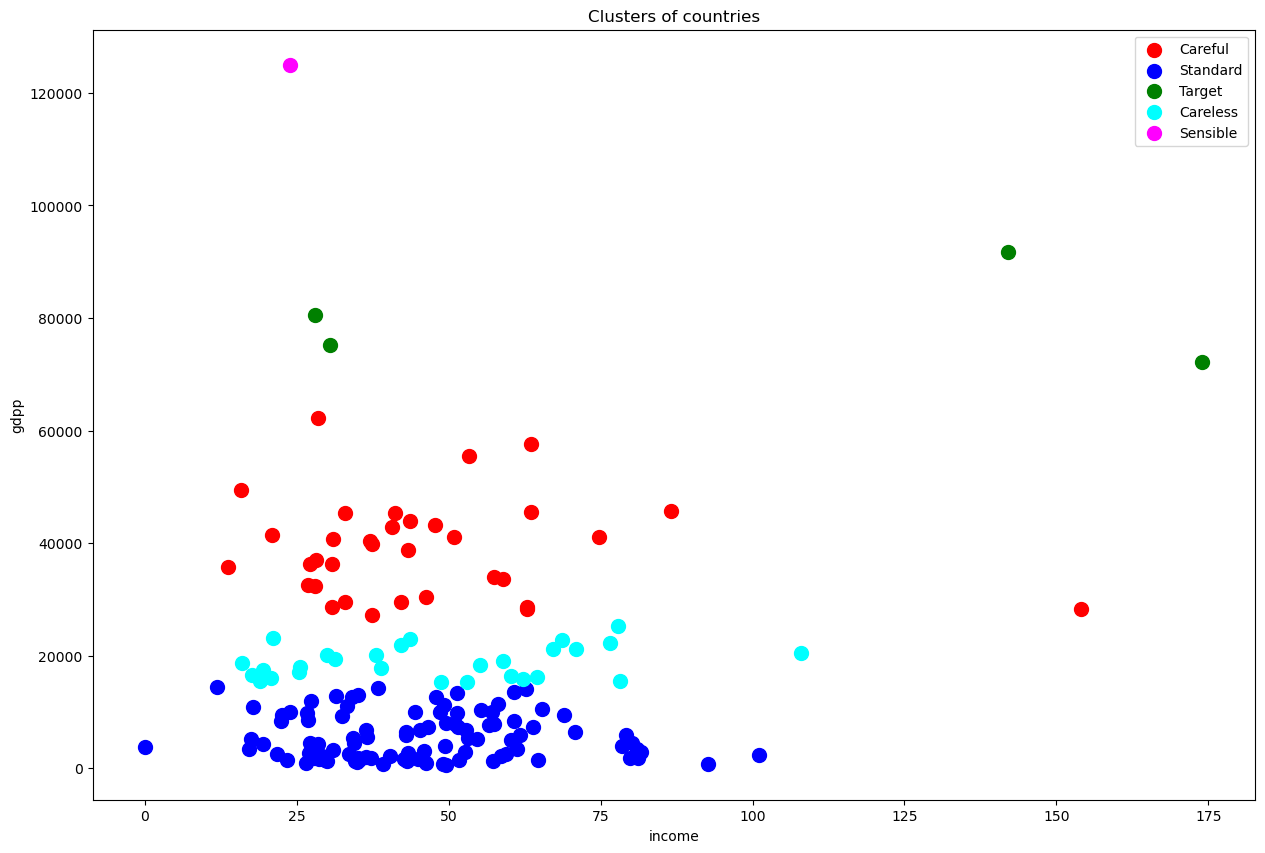

In [15]:
# Visualizing the clusters (two dimensions only)
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of countries')
plt.xlabel('income')
plt.ylabel('gdpp')
plt.legend()
plt.show()